# Efficient Data Stream Anomaly Detection

In [2]:
#Libraries
import sklearn
import matplotlib
import random
import time
import numpy as np
from scipy.stats import norm


## 1. Suitable Algorithm
- I will use the Isolation Forest algorithm for anomaly detection.
- It's an unsupervised machine learning algorithm that identifies anomalies by isolating outliers in the data.

### Here's the step-by-step explanation of the iForest algorithm in markdown format:
1. Randomly select a subset of the data called the "training set."
2. For each data point in the training set, repeat the following steps:

    a. Randomly select a feature.
  
    b. Randomly select a split value between the maximum and minimum values of the selected feature.
  
    c. Isolate the data points that have values less than or equal to the split value for the selected feature.
  
    d. Repeat steps a-c for a specified number of iterations (default is 100).

4. Calculate the average path length (average number of edges) from a randomly selected data point to the nearest isolated data point for each data point in the training set. This average path length is called the "average isolation depth."
5. For each data point in the training set, calculate the anomaly score using the following formula:
Anomaly score = average isolation depth of the data point / average isolation depth of all data points in the training set
6. Classify a data point as an anomaly if its anomaly score is above a specified threshold (default is 0.5).

### The iForest algorithm has several advantages, including:
- It can handle both numerical and categorical data.
- It is efficient and scalable, making it suitable for large datasets.
- It does not require any parameter tuning, making it easy to use.
- It can handle both global and local anomalies.

In [6]:
from sklearn.ensemble import IsolationForest

## Step 2: Data Stream Simulation 

In [8]:
def generate_data_stream(n_samples, pattern_freq, seasonal_freq, noise_level):
    # Generate regular patterns
    pattern = np.sin(np.linspace(0, 2 * np.pi * pattern_freq, n_samples))
    
    # Generate seasonal elements
    seasonal = np.sin(np.linspace(0, 2 * np.pi * seasonal_freq, n_samples))
    
    # Generate random noise
    noise = np.random.normal(0, noise_level, n_samples)
    
    # Combine all components
    data_stream = pattern + seasonal + noise
    
    return data_stream

## Step 3: Anomaly Detection

In [10]:
def detect_anomalies(data_stream, contamination_fraction):
    # Initialize the Isolation Forest model
    model = IsolationForest(contamination=contamination_fraction)
    
    # Reshape the data_stream to fit the model
    data_stream_2d = data_stream.reshape(-1, 1)
    
    # Fit the model to the data_stream
    model.fit(data_stream_2d)
    
    # Predict anomalies
    anomaly_scores = model.decision_function(data_stream_2d)
    anomaly_predictions = model.predict(data_stream_2d)
    
    # Flag anomalies as True (1) and normal points as False (0)
    anomalies = anomaly_predictions == -1
    
    return anomalies, anomaly_scores

## Step 4: Optimization
- The Isolation Forest algorithm is already optimized for speed and efficiency.
- By using numpy's vectorized operations in step 2  **generate_data_stream** function, the script optimizes the data generation process, making it faster and more efficient.
- Here's a brief explanation of the optimization in the generate_data_stream function:
  - The **np.linspace** function is used to generate evenly spaced values over a specified interval. This function is vectorized, meaning it operates on entire arrays instead of individual elements.
  - The **np.sin** function is applied to the generated values to create the regular patterns and seasonal elements. These operations are also vectorized, resulting in efficient computation.
  - The **np.random.normal** function is used to generate random noise. This function is also vectorized, allowing for efficient generation of noise for the entire data stream.
  - The generated components are combined using addition. This operation is also vectorized, resulting in a more efficient data stream generation process. process.

## Step 5: Visualization

In [13]:
def visualize_data_stream(data_stream, anomalies):
    import matplotlib.pyplot as plt
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Plot the data stream
    ax.plot(data_stream, label='Data Stream')
    
    # Plot the anomalies
    anomaly_indices = np.where(anomalies)[0]
    ax.scatter(anomaly_indices, data_stream[anomaly_indices], color='red', label='Anomalies')
    
    # Add labels and legend
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
    
    # Show the plot
    plt.show()

## Example usage

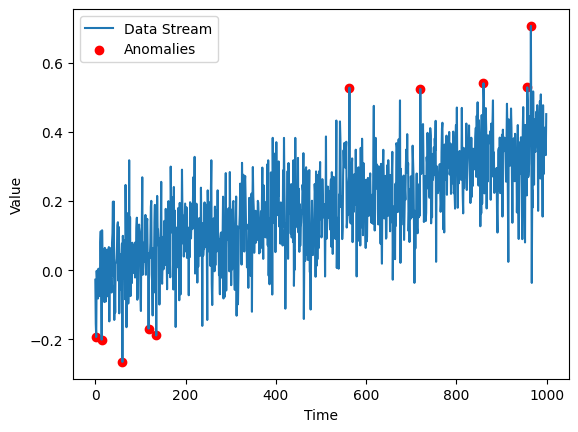

In [15]:
n_samples = 1000
pattern_freq = 0.01
seasonal_freq = 0.05
noise_level = 0.1
contamination_fraction = 0.01

# Generate the data stream
data_stream = generate_data_stream(n_samples, pattern_freq, seasonal_freq, noise_level)

# Detect anomalies
anomalies, anomaly_scores = detect_anomalies(data_stream, contamination_fraction)

# Visualize the data stream and anomalies
visualize_data_stream(data_stream, anomalies)